In [1]:
!pip install citipy

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-83.13968205621237, -40.29137839969789),
 (13.272421491953352, -53.22649788040903),
 (-19.1564536881055, 150.56486739241683),
 (76.68615935537701, -46.407997151617735),
 (54.6801808546449, -124.86115957911991),
 (36.30689190259746, -171.35786778891338),
 (-74.81024935375288, 33.4004925146653),
 (45.304478660169195, -13.659512792279287),
 (-55.59227796307201, -156.62118163868973),
 (11.218358350297507, -82.79056330686464),
 (39.30454491092175, 26.20398117809185),
 (-82.55468398840532, -125.56389478202456),
 (-40.19104585253346, 29.424367293653404),
 (-84.80186853322546, 120.24557355744258),
 (-18.12393584938681, 107.99176993401909),
 (14.16608614683031, -146.3601125177359),
 (20.66420522749266, 120.81268726298157),
 (0.9491346027914886, 146.46058932397307),
 (12.292698925268809, 172.49341954468883),
 (16.339644937053933, 92.66103139878612),
 (6.0136676516484044, -174.71577240655841),
 (-47.979017031266466, 87.51628713958968),
 (-5.047159671944556, 13.015886499793623),
 (14.13406161207

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
#import dependencies
from config import weather_api_key
import requests
from datetime import datetime

In [7]:
#build basic url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i,city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | mackay
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | fort saint james
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | muros
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | corn island
Processing Record 11 of Set 1 | stipsi
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | basco
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | labutta
City not found. Skipping...
Processing Record 21 of Set 1 | vaitupu
City not found. Skipping..

Processing Record 41 of Set 4 | bozoum
Processing Record 42 of Set 4 | alofi
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | port pirie
Processing Record 45 of Set 4 | severnyy
Processing Record 46 of Set 4 | nome
Processing Record 47 of Set 4 | flinders
Processing Record 48 of Set 4 | palora
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | port augusta
Processing Record 1 of Set 5 | tasiilaq
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | grimari
City not found. Skipping...
Processing Record 4 of Set 5 | nikolskoye
Processing Record 5 of Set 5 | manta
Processing Record 6 of Set 5 | manzhouli
Processing Record 7 of Set 5 | grandview
Processing Record 8 of Set 5 | yerbogachen
Processing Record 9 of Set 5 | ruteng
Processing Record 10 of Set 5 | te anau
Processing Record 11 of Set 5 | manacapuru
Processing Record 12 of Set 5 | muravlenko
Processing Record 13 of Set 5 | sobolevo
Proce

Processing Record 27 of Set 8 | chagda
City not found. Skipping...
Processing Record 28 of Set 8 | atbasar
Processing Record 29 of Set 8 | iki-burul
Processing Record 30 of Set 8 | nelson bay
Processing Record 31 of Set 8 | sistranda
Processing Record 32 of Set 8 | phan thiet
Processing Record 33 of Set 8 | ghanzi
Processing Record 34 of Set 8 | sao filipe
Processing Record 35 of Set 8 | gualeguaychu
Processing Record 36 of Set 8 | peniche
Processing Record 37 of Set 8 | hirado
Processing Record 38 of Set 8 | yarim
Processing Record 39 of Set 8 | miedzyrzec podlaski
Processing Record 40 of Set 8 | kaoma
Processing Record 41 of Set 8 | kamaishi
Processing Record 42 of Set 8 | steamboat springs
Processing Record 43 of Set 8 | manitouwadge
Processing Record 44 of Set 8 | batagay-alyta
Processing Record 45 of Set 8 | kindu
Processing Record 46 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 47 of Set 8 | nioro
Processing Record 48 of Set 8 | snoghoj
Processing Record 49 of

Processing Record 16 of Set 12 | oussouye
Processing Record 17 of Set 12 | dese
Processing Record 18 of Set 12 | tiznit
Processing Record 19 of Set 12 | deputatskiy
Processing Record 20 of Set 12 | daru
Processing Record 21 of Set 12 | prince rupert
Processing Record 22 of Set 12 | kyzyl-suu
Processing Record 23 of Set 12 | thinadhoo
Processing Record 24 of Set 12 | magdagachi
Processing Record 25 of Set 12 | duluth
Processing Record 26 of Set 12 | sosnovoborsk
Processing Record 27 of Set 12 | yilan
Processing Record 28 of Set 12 | boende
Processing Record 29 of Set 12 | sines
Processing Record 30 of Set 12 | toftir
City not found. Skipping...
Processing Record 31 of Set 12 | vila
Processing Record 32 of Set 12 | jackson
Processing Record 33 of Set 12 | torres
Processing Record 34 of Set 12 | biak
Processing Record 35 of Set 12 | samarkand
Processing Record 36 of Set 12 | khonuu
City not found. Skipping...
Processing Record 37 of Set 12 | camacha
Processing Record 38 of Set 12 | muisne

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,40.66,75,75,12.66,AR,2021-10-23 01:56:49
1,Bathsheba,13.2167,-59.5167,83.01,69,20,24.16,BB,2021-10-23 01:56:49
2,Mackay,-21.1500,149.2000,96.67,66,7,13.80,AU,2021-10-23 01:56:49
3,Ilulissat,69.2167,-51.1000,5.27,72,98,8.57,GL,2021-10-23 01:56:50
4,Fort Saint James,54.4333,-124.2500,43.12,65,1,0.36,CA,2021-10-23 01:56:50
5,Kapaa,22.0752,-159.3190,84.18,85,12,1.01,US,2021-10-23 01:56:51
6,Port Elizabeth,-33.9180,25.5701,66.09,77,0,4.61,ZA,2021-10-23 01:52:01
7,Muros,42.7762,-9.0603,55.24,90,5,5.10,ES,2021-10-23 01:56:51
8,Mataura,-46.1927,168.8643,72.32,39,99,1.28,NZ,2021-10-23 01:56:52
9,Corn Island,12.1694,-83.0418,82.90,76,92,9.53,NI,2021-10-23 01:56:52


In [10]:
# Rearrange columns
new_columns = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-10-23 01:56:49,-54.8000,-68.3000,40.66,75,75,12.66
1,Bathsheba,BB,2021-10-23 01:56:49,13.2167,-59.5167,83.01,69,20,24.16
2,Mackay,AU,2021-10-23 01:56:49,-21.1500,149.2000,96.67,66,7,13.80
3,Ilulissat,GL,2021-10-23 01:56:50,69.2167,-51.1000,5.27,72,98,8.57
4,Fort Saint James,CA,2021-10-23 01:56:50,54.4333,-124.2500,43.12,65,1,0.36
5,Kapaa,US,2021-10-23 01:56:51,22.0752,-159.3190,84.18,85,12,1.01
6,Port Elizabeth,ZA,2021-10-23 01:52:01,-33.9180,25.5701,66.09,77,0,4.61
7,Muros,ES,2021-10-23 01:56:51,42.7762,-9.0603,55.24,90,5,5.10
8,Mataura,NZ,2021-10-23 01:56:52,-46.1927,168.8643,72.32,39,99,1.28
9,Corn Island,NI,2021-10-23 01:56:52,12.1694,-83.0418,82.90,76,92,9.53


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1634954442.3943107

In [14]:
time.strftime("%x")

'10/22/21'

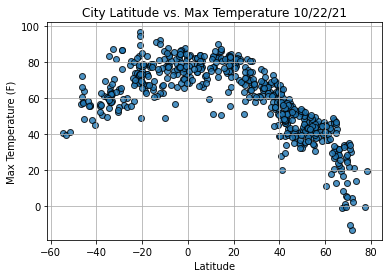

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

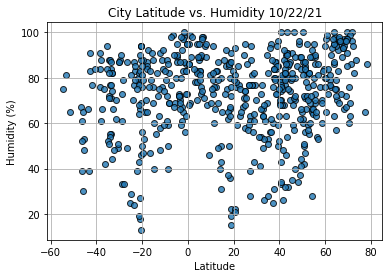

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

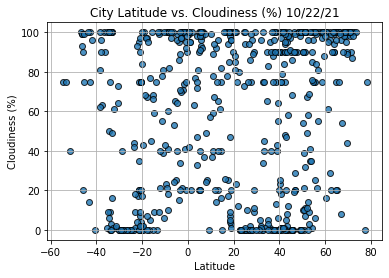

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

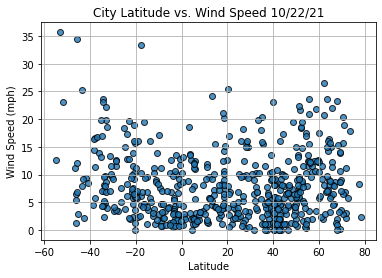

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [21]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [22]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

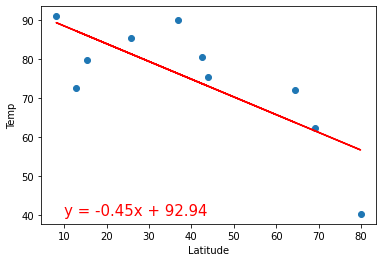

In [23]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

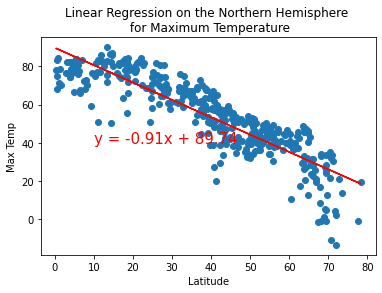

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

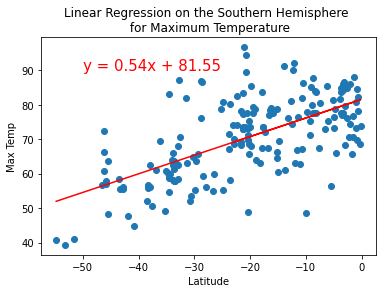

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

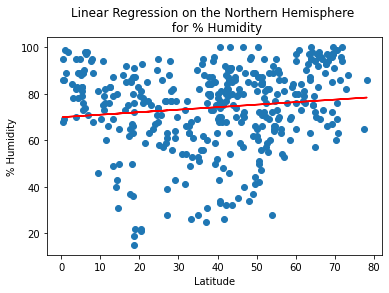

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

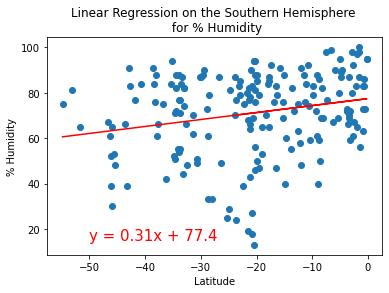

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

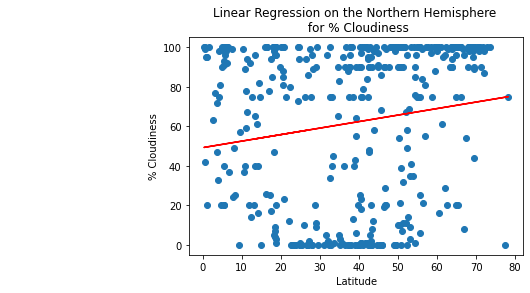

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

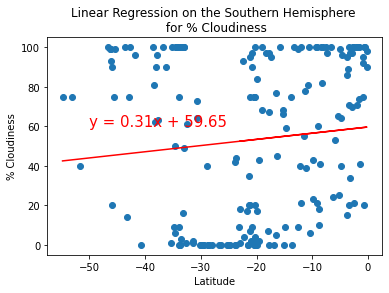

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

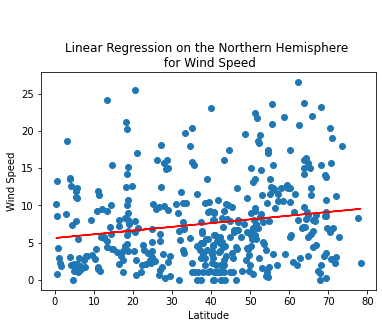

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

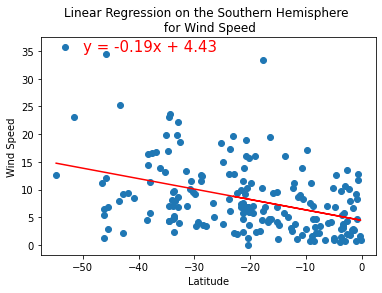

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [34]:
!pip install gmaps